In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import math

from scipy.spatial.transform import Rotation
import logging;
logging.disable(logging.WARNING)

In [2]:
K = np.array([[1000,0,300],[0,1000,200],[0,0,1]]);
R1 = np.array([[1,0,0],[0,1,0],[0,0,1]]);
t1 = np.array([[0],[0],[0]]);

In [3]:
R2 = Rotation.from_euler('xyz',[0.7,-0.5,0.8]).as_matrix();
t2 = np.array([[0.2],[2],[1]]);

## Exercise 3.1

In [4]:
def projectpoints(K, R, t, Q):
    Rt = np.hstack((R,t))
    Qh = np.vstack((Q,np.ones(len(Q[0]))))
    q = K@Rt@Qh
    return q[:-1]/q[-1]

In [5]:
Q = np.array([[1,0.5,4]]).T;
q1 = projectpoints(K,R1,t1,Q);
q2 = projectpoints(K,R2,t2,Q);
print('q1 is: \n',q1,'\n','q2 is :\n',q2);

q1 is: 
 [[550.]
 [325.]] 
 q2 is :
 [[582.47256835]
 [185.98985776]]


## Exercise 3.2

In [6]:
def CrossOp(p):
    px = np.array([  [0,-p[2],p[1]],[p[2],0,-p[0]],[-p[1],p[0],0]   ],dtype='float32')
    #px = np.array([  [0,-p[2],p[1]],[p[2],0,-p[0]],[-p[1],p[0],0]   ] )
    return px

In [7]:
a1 = np.array([1,2,3]);
a2 = np.array([4,5,6]);

In [8]:
CrossOp(a1)@a2

array([-3.,  6., -3.])

In [9]:
np.cross(a1,a2)

array([-3,  6, -3])

## Exercise 3.3

E = [t]xR  
F = A2^(-T)@E@A1^(-1)  
F = A2^(-T)@[t]xR@A1^(-1)  

In [10]:
F1 = np.linalg.inv(K).T@(CrossOp(t1)@R1)@np.linalg.inv(K)
F2 = np.linalg.inv(K).T@(CrossOp(t2)@R2)@np.linalg.inv(K)
print("the F1 is: \n",F1)
print("the F2 is: \n",F2)

the F1 is: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
the F2 is: 
 [[ 3.29311881e-07  8.19396327e-07  1.79162592e-03]
 [ 5.15532550e-07 -8.76915986e-07  9.31426644e-05]
 [-1.29882755e-03  1.51951700e-03 -1.10072683e+00]]


C:\Users\WANGHU~1\AppData\Local\Temp/ipykernel_15104/3538129574.py:2: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  px = np.array([  [0,-p[2],p[1]],[p[2],0,-p[0]],[-p[1],p[0],0]   ],dtype='float32')


## Exercise 3.4

In [11]:
#epipolar line l of q1
l = F2@ np.vstack((q1,np.ones(len(q1[0]))))
print(l)

[[ 2.23905126e-03]
 [ 9.16878713e-05]
 [-1.32123895e+00]]


## Exercise 3.5

In [12]:
#Is q2 located on the epipolar line?
#If a point is on the line ,then p.T@l=0
(np.vstack((q2,np.ones(len(q2[0])))).T@l).round(2)

array([[-0.]])

## Exercise 3.8

In [13]:
np.load('TwoImageData.npy',allow_pickle=True).item()

{'im1': array([[17, 17, 14, ..., 19, 18, 20],
        [15, 16, 15, ..., 18, 17, 19],
        [14, 14, 15, ..., 18, 18, 21],
        ...,
        [13, 14, 16, ...,  4,  4,  5],
        [13, 13, 14, ...,  4,  5,  6],
        [12, 13, 14, ...,  6,  6,  5]], dtype=uint8),
 'im2': array([[14, 15, 12, ..., 22, 20, 21],
        [13, 14, 14, ..., 21, 19, 20],
        [13, 12, 13, ..., 19, 20, 22],
        ...,
        [14, 19, 38, ...,  5,  5,  6],
        [27, 56, 90, ...,  5,  6,  7],
        [49, 76, 74, ...,  5,  7,  6]], dtype=uint8),
 'R1': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 'R2': array([[ 9.97063888e-01,  1.21564307e-04,  7.65740684e-02],
        [-1.37753401e-04,  9.99999969e-01,  2.06135565e-04],
        [-7.65740409e-02, -2.16078666e-04,  9.97063874e-01]]),
 't1': array([[0.],
        [0.],
        [0.]]),
 't2': array([[-0.04594547],
        [-0.00017171],
        [ 0.00157051]]),
 'K': array([[1.41448973e+03, 0.00000000e+00, 4.01393651e+02],
       

In [14]:
data = np.load('TwoImageData.npy',allow_pickle=True).item()

In [15]:
data["K"]

array([[1.41448973e+03, 0.00000000e+00, 4.01393651e+02],
       [0.00000000e+00, 1.41427075e+03, 3.08091633e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [16]:
F = np.linalg.inv(data["K"]).T@(CrossOp(data["t2"])@data["R2"])@np.linalg.inv(data["K"])
print(F)

[[ 6.67972386e-12 -7.85049965e-10  1.17921973e-07]
 [-9.75936932e-10 -4.86806496e-12  3.28699187e-05]
 [ 4.23506595e-07 -3.21704070e-05 -2.12002222e-04]]


C:\Users\WANGHU~1\AppData\Local\Temp/ipykernel_15104/3538129574.py:2: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  px = np.array([  [0,-p[2],p[1]],[p[2],0,-p[0]],[-p[1],p[0],0]   ],dtype='float32')


## Exercise 3.9

In [17]:
def DrawLine(l, shape):
#Checks where the line intersects the four sides of the image
# and finds the two intersections that are within the frame
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    plt.plot(*np.array(P).T,'r')

In [18]:
def DrawEpipolarLine(im1,im2,F):
    %matplotlib qt
    plt.imshow(im1,cmap='gray')
    x = plt.ginput(1) # one input
    %matplotlib inline
    
    p1 = np.array(x).reshape(2,1)
    l = F@ np.vstack((p1,np.ones(len(p1[0]))))
    
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(im1,cmap='gray')
    plt.plot(p1[0],p1[1],'rx')
    plt.subplot(1,2,2)
    plt.imshow(im2,cmap='gray')
    DrawLine(l,im2.shape)

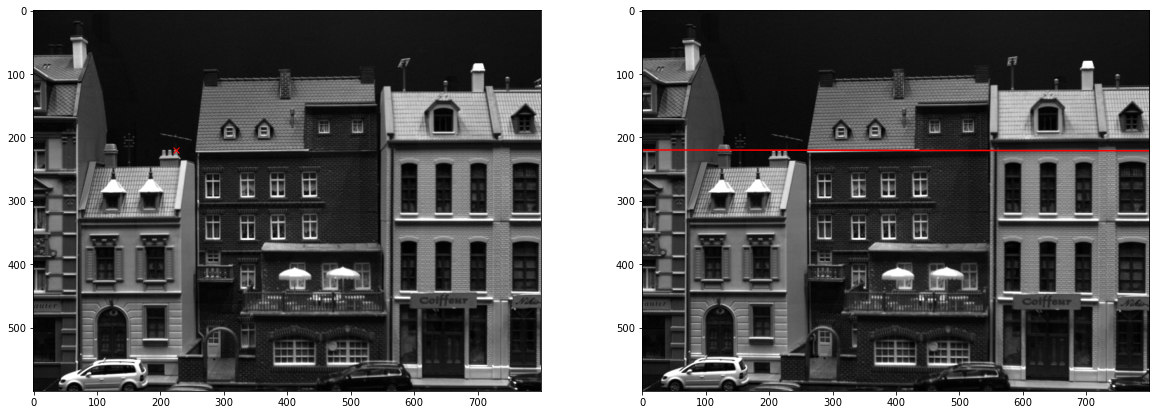

In [19]:
im1 = data['im1']
im2 = data['im2']
DrawEpipolarLine(im1,im2,F)

## Exercise 3.10

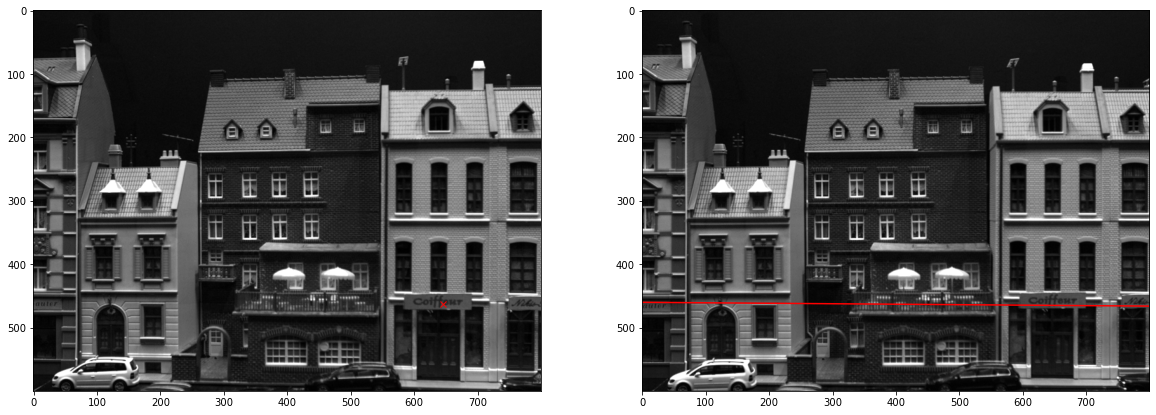

In [20]:
DrawEpipolarLine(im2,im1,F)

## Exercise 3.11

In [21]:
def triangulate(q,P):
    n = len(P)
    B = np.zeros((2*n,4))
    for i in range(len(P)):
        B[2*i] = P[i][2]*q[0][i]-P[i][0]
        B[2*i+1] = P[i][2]*q[1][i]-P[i][1]
    _,_,vh = np.linalg.svd(B.T@B)
    Q = vh[-1, :]
    return Q[:3].reshape(3, 1) / Q[3]

In [22]:
K = np.array([[1000,0,300],[0,1000,200],[0,0,1]]);
R1 = np.identity(3);
t1 = np.zeros((3,1));
R2 = Rotation.from_euler('xyz',[0.7,-0.5,0.8]).as_matrix();
t2 = np.array([[0.2],[2],[1]]);
R3 = Rotation.from_euler('xyz',[0.1,-0.1,0.1]).as_matrix();
t3 = np.array([[0.2],[2],[1]]);

def projectpoints(K, R, t, Q):
    Rt = np.hstack((R,t))
    Qh = np.vstack((Q,np.ones(len(Q[0]))))
    q = K@Rt@Qh
    return q[:-1]/q[-1]

Q = np.array([[1,0.5,4]]).T;
q1 = projectpoints(K,R1,t1,Q);
q2 = projectpoints(K,R2,t2,Q);
q3 = projectpoints(K,R3,t3,Q);

P1 = K@np.hstack((R1,t1))
P2 = K@np.hstack((R2,t2))
P3 = K@np.hstack((R3,t3))

In [23]:
q = np.hstack((q1,q2,q3))
P = [P1,P2,P3]

In [24]:
Qt = triangulate(q,P)

In [25]:
print('the Q is: \n',Q,'\n','the triangulation Q is:\n',Qt)

the Q is: 
 [[1. ]
 [0.5]
 [4. ]] 
 the triangulation Q is:
 [[1. ]
 [0.5]
 [4. ]]
